In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t

In [4]:
data= pd.read_csv(r'C:\Users\user\Downloads\Quantium\QVI_data.csv')
data

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2370701,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream
264830,2370751,2018-10-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium
264831,2370961,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,TYRRELLS,OLDER FAMILIES,Budget
264832,2370961,2018-10-27,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,OLD,OLDER FAMILIES,Budget


In [6]:
# extracting the year and month
data['YEARMONTH'] = pd.to_datetime(data['DATE']).dt.strftime('%Y%m')


In [8]:
#Calculate metrics of interest over time for each store
measure_over_time = (
    data.groupby(['STORE_NBR', 'YEARMONTH'])
    .agg(
        totalSales=('TOT_SALES', 'sum'),  # Replace 'SALES_REVENUE' with the actual column name for sales
        nCustomers=('LYLTY_CARD_NBR', 'nunique'),  # Replace 'CUSTOMER_ID' with the actual column name for customers
        nTxnPerCust=('TXN_ID', 'count'),  # Replace 'TRANSACTION_ID' with the actual column name for transactions
        nChipsPerTxn=('PROD_QTY', 'sum'),  # Replace 'CHIPS_QTY' with the actual column name for chips quantity
    )
    .reset_index()
)
# Calculate the average price per unit
measure_over_time['avgPricePerUnit'] = (
    measure_over_time['totalSales'] / measure_over_time['nChipsPerTxn']
)
measure_over_time

,STORE_NBR,YEARMONTH,totalSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit
0,1,201807,206.9,49,52,62,3.337097
1,1,201808,176.1,42,43,54,3.261111
2,1,201809,278.8,59,62,75,3.717333
3,1,201810,188.1,44,45,58,3.243103
4,1,201811,192.6,46,47,57,3.378947
...,...,...,...,...,...,...,...
3164,272,201902,395.5,45,48,91,4.346154
3165,272,201903,442.3,50,53,101,4.379208
3166,272,201904,445.1,54,56,105,4.239048
3167,272,201905,314.6,34,40,71,4.430986


In [10]:
# Convert YEARMONTH to integer
measure_over_time['YEARMONTH'] = measure_over_time['YEARMONTH'].astype(int)

# Identify stores with full observation periods (12 months)
stores_with_full_obs = measure_over_time.groupby('STORE_NBR').filter(lambda x: len(x) == 12)['STORE_NBR'].unique()

# Filter to the pre-trial period and stores with full observation periods
pre_trial_measures = measure_over_time[(measure_over_time['YEARMONTH'] < 201902) & (measure_over_time['STORE_NBR'].isin(stores_with_full_obs))]

pre_trial_measures

,STORE_NBR,YEARMONTH,totalSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit
0,1,201807,206.9,49,52,62,3.337097
1,1,201808,176.1,42,43,54,3.261111
2,1,201809,278.8,59,62,75,3.717333
3,1,201810,188.1,44,45,58,3.243103
4,1,201811,192.6,46,47,57,3.378947
...,...,...,...,...,...,...,...
3159,272,201809,304.7,32,36,71,4.291549
3160,272,201810,430.6,44,51,99,4.349495
3161,272,201811,376.2,41,45,87,4.324138
3162,272,201812,403.9,47,47,89,4.538202


In [12]:

def calculate_correlation(input_table, metric_col, store_comparison):
    # Initialize an empty DataFrame to store correlation results
    calc_corr_table = pd.DataFrame(columns=['Store1', 'Store2', 'corr_measure'])
    
    # Get the list of store numbers excluding the comparison store
    store_numbers = input_table[input_table['STORE_NBR'] != store_comparison]['STORE_NBR'].unique()
    
    # Loop through each store number to calculate correlation
    for store in store_numbers:
        # Extract the metric values for the comparison store and the current store
        comparison_store_metrics = input_table[input_table['STORE_NBR'] == store_comparison].sort_values(by='YEARMONTH')[metric_col]
        control_store_metrics = input_table[input_table['STORE_NBR'] == store].sort_values(by='YEARMONTH')[metric_col]
        
        # Calculate the correlation
        corr_measure, _ = comparison_store_metrics.corr(control_store_metrics)
        
        # Create a DataFrame with the results
        calculated_measure = pd.DataFrame({'Store1': [store_comparison], 'Store2': [store], 'corr_measure': [corr_measure]})
        
        # Append the results to the calc_corr_table
        calc_corr_table = pd.concat([calc_corr_table, calculated_measure], ignore_index=True)
    
    # Return the table with correlations
    return calc_corr_table



In [14]:
# Function to calculate correlation
def calculate_correlation(data, col1, col2):
    return data.loc[data['STORE_NBR'] == trial_store][col1].corr(data.loc[data['STORE_NBR'] == trial_store][col2])

# Function to calculate magnitude distance
def calculate_magnitude_distance(data, col, trial_store):
    return (data[col] - data.loc[data['STORE_NBR'] == trial_store][col]).abs().sum()

# Select the trial store (replace 77 with the actual trial store number)
trial_store = 77

# Calculate correlations for total sales and number of customers
corr_n_sales = calculate_correlation(pre_trial_measures, 'totalSales', 'totalSales')
corr_n_customers = calculate_correlation(pre_trial_measures, 'nCustomers', 'nCustomers')

# Calculate magnitude distances for total sales and number of customers
magnitude_n_sales = calculate_magnitude_distance(pre_trial_measures, 'totalSales', trial_store)
magnitude_n_customers = calculate_magnitude_distance(pre_trial_measures, 'nCustomers', trial_store)

# Combine the correlation and magnitude scores
corr_weight = 0.5

score_n_sales = pd.DataFrame({
    'STORE_NBR': pre_trial_measures['STORE_NBR'].unique(),
    'corr_nSales': corr_n_sales,
    'mag_nSales': magnitude_n_sales
})
score_n_sales['scoreNSales'] = corr_weight * score_n_sales['corr_nSales'] + (1 - corr_weight) * score_n_sales['mag_nSales']

score_n_customers = pd.DataFrame({
    'STORE_NBR': pre_trial_measures['STORE_NBR'].unique(),
    'corr_nCustomers': corr_n_customers,
    'mag_nCustomers': magnitude_n_customers
})
score_n_customers['scoreNCust'] = corr_weight * score_n_customers['corr_nCustomers'] + (1 - corr_weight) * score_n_customers['mag_nCustomers']

# Display the combined scores
print("Total Sales Score:")
print(score_n_sales)
print("\nNumber of Customers Score:")
print(score_n_customers)

Total Sales Score:
     STORE_NBR  corr_nSales  mag_nSales  scoreNSales
0            1          1.0         0.0          0.5
1            2          1.0         0.0          0.5
2            3          1.0         0.0          0.5
3            4          1.0         0.0          0.5
4            5          1.0         0.0          0.5
..         ...          ...         ...          ...
255        268          1.0         0.0          0.5
256        269          1.0         0.0          0.5
257        270          1.0         0.0          0.5
258        271          1.0         0.0          0.5
259        272          1.0         0.0          0.5

[260 rows x 4 columns]

Number of Customers Score:
     STORE_NBR  corr_nCustomers  mag_nCustomers  scoreNCust
0            1              1.0             0.0         0.5
1            2              1.0             0.0         0.5
2            3              1.0             0.0         0.5
3            4              1.0             0.0      

In [16]:
# Combine scores across the drivers
score_control = pd.merge(score_n_sales, score_n_customers, on='STORE_NBR')
score_control['finalControlScore'] = score_control['scoreNSales'] * 0.5 + score_control['scoreNCust'] * 0.5

# Select control store based on the highest matching store (excluding the trial store)
trial_store = 77
control_store = score_control[score_control['STORE_NBR'] != trial_store].nlargest(1, 'finalControlScore')['STORE_NBR'].values[0]

# Print the selected control store
print(f"Control Store for Trial Store {trial_store}: {control_store}")

Control Store for Trial Store 77: 1


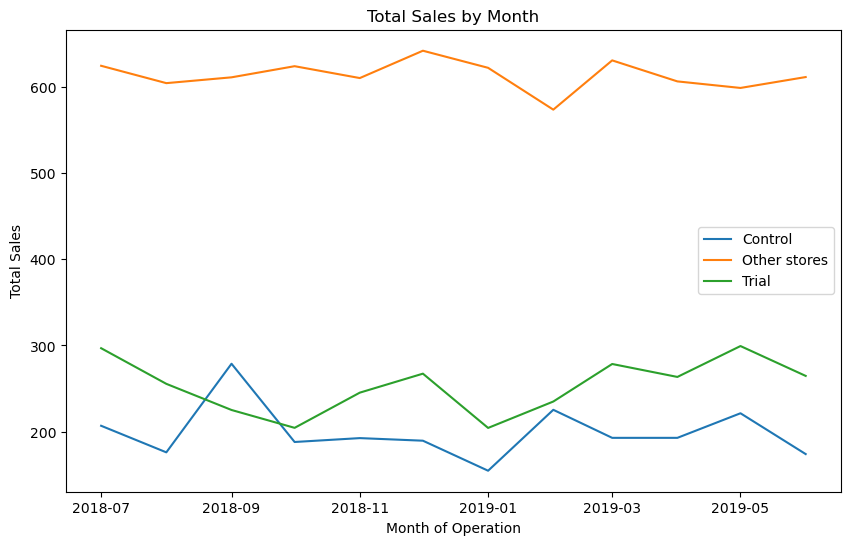

In [18]:
# Prepare data for plotting total sales
past_sales = (
    measure_over_time
    .assign(Store_type=lambda x: x['STORE_NBR'].apply(lambda y: 'Trial' if y == trial_store else ('Control' if y == control_store else 'Other stores')))
    .groupby(['YEARMONTH', 'Store_type'], as_index=False)
    .agg(totalSales=('totalSales', 'mean'))
)

# Convert YEARMONTH to a datetime format for plotting
past_sales['TransactionMonth'] = pd.to_datetime(past_sales['YEARMONTH'].astype(str) + '01', format='%Y%m%d')

# Plot total sales by month
plt.figure(figsize=(10, 6))
for store_type in past_sales['Store_type'].unique():
    plt.plot(past_sales[past_sales['Store_type'] == store_type]['TransactionMonth'],
             past_sales[past_sales['Store_type'] == store_type]['totalSales'],
             label=store_type)

plt.xlabel("Month of Operation")
plt.ylabel("Total Sales")
plt.title("Total Sales by Month")
plt.legend()
plt.show()

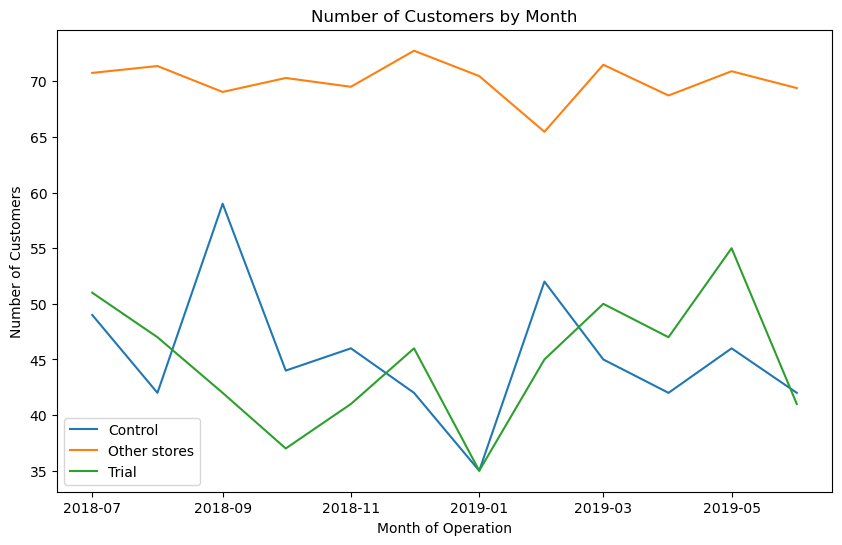

In [20]:
past_customers = (
    measure_over_time
    .assign(Store_type=lambda x: x['STORE_NBR'].apply(lambda y: 'Trial' if y == trial_store else ('Control' if y == control_store else 'Other stores')))
    .groupby(['YEARMONTH', 'Store_type'], as_index=False)
    .agg(nCustomers=('nCustomers', 'mean'))
)

# Convert YEARMONTH to a datetime format for plotting
past_customers['TransactionMonth'] = pd.to_datetime(past_customers['YEARMONTH'].astype(str) + '01', format='%Y%m%d')

# Plot number of customers by month
plt.figure(figsize=(10, 6))
for store_type in past_customers['Store_type'].unique():
    plt.plot(past_customers[past_customers['Store_type'] == store_type]['TransactionMonth'],
             past_customers[past_customers['Store_type'] == store_type]['nCustomers'],
             label=store_type)

plt.xlabel("Month of Operation")
plt.ylabel("Number of Customers")
plt.title("Number of Customers by Month")
plt.legend()
plt.show()

In [22]:
# Scaling control store's sales to match trial store's sales
scaling_factor_for_control_sales = (
    pre_trial_measures.loc[(pre_trial_measures['STORE_NBR'] == trial_store) & (pre_trial_measures['YEARMONTH'] < 201902), 'totalSales'].sum() /
    pre_trial_measures.loc[(pre_trial_measures['STORE_NBR'] == control_store) & (pre_trial_measures['YEARMONTH'] < 201902), 'totalSales'].sum()
)

# Apply the scaling factor
measure_over_time_sales = measure_over_time.copy()
measure_over_time_sales.loc[measure_over_time_sales['STORE_NBR'] == control_store, 'controlSales'] = measure_over_time_sales['totalSales'] * scaling_factor_for_control_sales

# Display the scaled control sales
print(measure_over_time_sales[measure_over_time_sales['STORE_NBR'] == control_store])

    STORE_NBR  YEARMONTH  totalSales  nCustomers  nTxnPerCust  nChipsPerTxn  \
0           1     201807       206.9          49           52            62   
1           1     201808       176.1          42           43            54   
2           1     201809       278.8          59           62            75   
3           1     201810       188.1          44           45            58   
4           1     201811       192.6          46           47            57   
5           1     201812       189.6          42           47            57   
6           1     201901       154.8          35           36            42   
7           1     201902       225.4          52           55            65   
8           1     201903       192.9          45           49            58   
9           1     201904       192.9          42           43            57   
10          1     201905       221.4          46           51            66   
11          1     201906       174.1          42    

In [24]:
# Calculate the percentage difference between scaled control sales and trial sales
percentage_diff = measure_over_time_sales.loc[measure_over_time_sales['STORE_NBR'].isin([trial_store, control_store])]

# Creating a slice of the DataFrame
percentage_diff = measure_over_time_sales[measure_over_time_sales['STORE_NBR'] == control_store].copy()
# Assuming percentage_diff is your DataFrame
percentage_diff.loc[:, 'percentageDiff'] = (percentage_diff['totalSales'] - percentage_diff['controlSales']) / percentage_diff['controlSales'] * 100

# Calculate the standard deviation of the percentage difference in the pre-trial period
pre_trial_diff = percentage_diff[percentage_diff['YEARMONTH'] < 201902]['percentageDiff']
std_dev = pre_trial_diff.std()

In [26]:
# Calculate the t-values for the trial months
degrees_of_freedom = len(pre_trial_diff) - 1
percentage_diff['tValue'] = (percentage_diff['percentageDiff'] - 0) / std_dev
percentage_diff['TransactionMonth'] = pd.to_datetime(percentage_diff['YEARMONTH'].astype(str) + '01', format='%Y%m%d')

# Find the 95th percentile of the t-distribution
t_critical = t.ppf(0.95, degrees_of_freedom)

# Print the results
print(f"Degrees of Freedom: {degrees_of_freedom}")
print(f"Standard Deviation: {std_dev:.2f}")
print(f"t-critical (95th percentile): {t_critical:.2f}")
print(percentage_diff)

Degrees of Freedom: 6
Standard Deviation: 0.00
t-critical (95th percentile): 1.94
    STORE_NBR  YEARMONTH  totalSales  nCustomers  nTxnPerCust  nChipsPerTxn  \
0           1     201807       206.9          49           52            62   
1           1     201808       176.1          42           43            54   
2           1     201809       278.8          59           62            75   
3           1     201810       188.1          44           45            58   
4           1     201811       192.6          46           47            57   
5           1     201812       189.6          42           47            57   
6           1     201901       154.8          35           36            42   
7           1     201902       225.4          52           55            65   
8           1     201903       192.9          45           49            58   
9           1     201904       192.9          42           43            57   
10          1     201905       221.4          46 

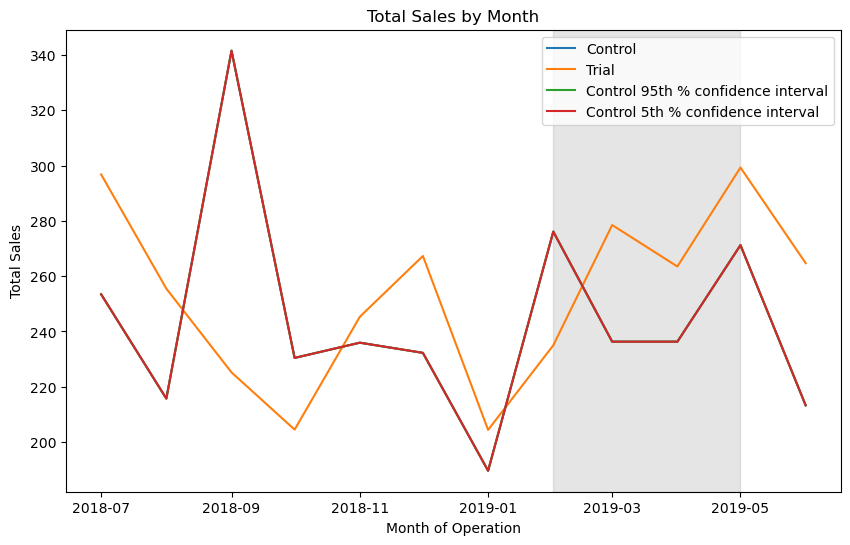

In [28]:
# Visualize the results
trial_assessment = measure_over_time_sales.loc[measure_over_time_sales['STORE_NBR'].isin([trial_store, control_store])].copy()
trial_assessment.loc[:, 'Store_type'] = trial_assessment['STORE_NBR'].apply(lambda x: 'Trial' if x == trial_store else 'Control')
trial_assessment.loc[:, 'totalSales'] = trial_assessment['totalSales'].where(trial_assessment['STORE_NBR'] == trial_store, trial_assessment['controlSales'])

# Create the 'TransactionMonth' column
trial_assessment.loc[:, 'TransactionMonth'] = pd.to_datetime(trial_assessment['YEARMONTH'].astype(str) + '01', format='%Y%m%d')

# Control store 95th percentile
trial_assessment_controls_95 = trial_assessment[trial_assessment['STORE_NBR'] == control_store].copy()
trial_assessment_controls_95.loc[:, 'totalSales'] = trial_assessment_controls_95['totalSales'] * (1 + std_dev * 2)
trial_assessment_controls_95.loc[:, 'Store_type'] = 'Control 95th % confidence interval'

# Control store 5th percentile
trial_assessment_controls_5 = trial_assessment[trial_assessment['STORE_NBR'] == control_store].copy()
trial_assessment_controls_5.loc[:, 'totalSales'] = trial_assessment_controls_5['totalSales'] * (1 - std_dev * 2)
trial_assessment_controls_5.loc[:, 'Store_type'] = 'Control 5th % confidence interval'

# Combine all data for plotting
trial_assessment = pd.concat([trial_assessment, trial_assessment_controls_95, trial_assessment_controls_5])

# Plot the results
plt.figure(figsize=(10, 6))
for store_type in trial_assessment['Store_type'].unique():
    plt.plot(trial_assessment[trial_assessment['Store_type'] == store_type]['TransactionMonth'],
             trial_assessment[trial_assessment['Store_type'] == store_type]['totalSales'],
             label=store_type)

plt.axvspan(pd.to_datetime('2019-02-01'), pd.to_datetime('2019-05-01'), alpha=0.2, color='gray')
plt.xlabel("Month of Operation")
plt.ylabel("Total Sales")
plt.title("Total Sales by Month")
plt.legend()
plt.show()



In [30]:
# define measure_over_time_custs with specific columns
measure_over_time_custs = pre_trial_measures[['STORE_NBR', 'YEARMONTH', 'nCustomers']].copy()

# Define trial and control store numbers
trial_store = 77  # Replace with the actual trial store number
control_store = 86  # Replace with the actual control store number

# Compute scaling factor for control store customer counts
# Calculate the total customers for the trial store in the pre-trial period
trial_customers_pre_trial = measure_over_time_custs.loc[
    (measure_over_time_custs['STORE_NBR'] == trial_store) & (measure_over_time_custs['YEARMONTH'] < 201902), 'nCustomers'].sum()

control_customers_pre_trial = measure_over_time_custs.loc[
    (measure_over_time_custs['STORE_NBR'] == control_store) & (measure_over_time_custs['YEARMONTH'] < 201902), 'nCustomers'].sum()

# Avoid division by zero
if control_customers_pre_trial == 0:
    scaling_factor_for_control_cust = 0
else:
    scaling_factor_for_control_cust = trial_customers_pre_trial / control_customers_pre_trial

# Apply the scaling factor to control store customer counts
measure_over_time_custs['controlCustomers'] = np.where(
    measure_over_time_custs['STORE_NBR'] == control_store,
    measure_over_time_custs['nCustomers'] * scaling_factor_for_control_cust,
    measure_over_time_custs['nCustomers']
)


In [32]:

measure_over_time_custs['TransactionMonth'] = pd.to_datetime(measure_over_time_custs['YEARMONTH'].astype(str) + '01', format='%Y%m%d')

measure_over_time_custs['Store_type'] = measure_over_time_custs['STORE_NBR'].apply(lambda x: 'Trial' if x == trial_store else 'Control')

#Calculate the percentage difference between scaled control store customers and trial customers
percentage_diff = measure_over_time_custs.loc[measure_over_time_custs['STORE_NBR'].isin([trial_store, control_store])].copy()

# Use .loc[] to avoid SettingWithCopyWarning
percentage_diff.loc[:, 'percentageDiff'] = (percentage_diff['controlCustomers'] - percentage_diff['nCustomers']) / percentage_diff['nCustomers'] * 100


# Calculate standard deviation and degrees of freedom for the pre-trial period
std_dev = percentage_diff[percentage_diff['YEARMONTH'] < 201902]['percentageDiff'].std()
degrees_of_freedom = len(percentage_diff[percentage_diff['YEARMONTH'] < 201902]) - 1

# Prepare data for visualization
past_customers = (
    measure_over_time_custs
    .assign(Store_type=lambda x: np.where(x['STORE_NBR'] == trial_store, 'Trial', 'Control'))
    .groupby(['YEARMONTH', 'Store_type'], as_index=False)
    .agg(nCusts=('nCustomers', 'mean'))
)

# Control store 95th percentile
past_customers_controls_95 = past_customers[past_customers['Store_type'] == 'Control'].copy()
past_customers_controls_95['nCusts'] *= (1 + std_dev * 2)
past_customers_controls_95['Store_type'] = 'Control 95th % confidence interval'

# Control store 5th percentile
past_customers_controls_5 = past_customers[past_customers['Store_type'] == 'Control'].copy()
past_customers_controls_5['nCusts'] *= (1 - std_dev * 2)
past_customers_controls_5['Store_type'] = 'Control 5th % confidence interval'

# Combine all data for plotting
trial_assessment_customers = pd.concat([past_customers, past_customers_controls_95, past_customers_controls_5])



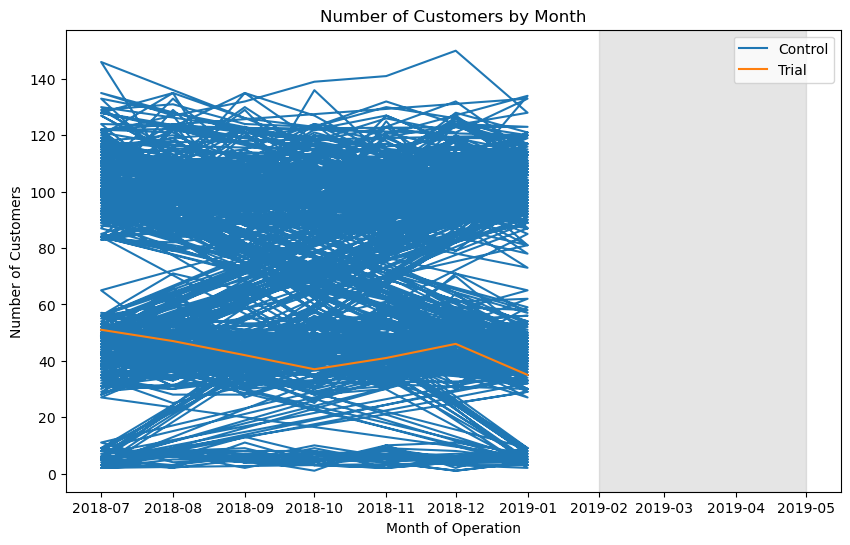

In [34]:
# Plot the results
plt.figure(figsize=(10, 6))
for store_type in measure_over_time_custs['Store_type'].unique():
    plt.plot(measure_over_time_custs[measure_over_time_custs['Store_type'] == store_type]['TransactionMonth'],
             measure_over_time_custs[measure_over_time_custs['Store_type'] == store_type]['controlCustomers'],
             label=store_type)

plt.axvspan(pd.to_datetime('2019-02-01'), pd.to_datetime('2019-05-01'), alpha=0.2, color='gray')
plt.xlabel("Month of Operation")
plt.ylabel("Number of Customers")
plt.title("Number of Customers by Month")
plt.legend()
plt.show()


In [36]:
# Define trial store number
trial_store = 86

# Step 1: Calculate metrics for trial store 86
metrics = measure_over_time.groupby('STORE_NBR').agg(
    totSales=('totalSales', 'sum'),
    nCustomers=('nCustomers', 'sum'),
    nTxnPerCust=('nTxnPerCust', 'mean'),
    nChipsPerTxn=('nChipsPerTxn', 'mean'),
    avgPricePerUnit=('avgPricePerUnit', 'mean')
).reset_index()

# Sort by total sales
metrics = metrics.sort_values(by='totSales', ascending=False)

# Display metrics
print(metrics)

     STORE_NBR  totSales  nCustomers  nTxnPerCust  nChipsPerTxn  \
225        226  17605.45        1620   168.333333    333.416667   
87          88  16333.25        1515   156.083333    309.833333   
164        165  15973.75        1488   151.583333    300.166667   
39          40  15559.50        1503   147.000000    291.583333   
236        237  15539.50        1498   148.750000    292.916667   
..         ...       ...         ...          ...           ...   
205        206      7.60           2     1.000000      1.000000   
251        252      7.40           2     1.000000      1.000000   
10          11      6.70           2     1.000000      1.000000   
75          76      6.00           1     1.000000      2.000000   
210        211      5.20           2     1.000000      1.000000   

     avgPricePerUnit  
225         4.398533  
87          4.393263  
164         4.435530  
39          4.448839  
236         4.420332  
..               ...  
205         3.800000  
251        

In [38]:
# Define correlation and magnitude functions (placeholders for your actual implementations)
def calculate_correlation(data, col1, col2):
    return data[col1].corr(data[col2])

def calculate_magnitude_distance(data, col, trial_store):
    trial_value = data.loc[data['STORE_NBR'] == trial_store, col].values[0]
    return np.abs(data[col] - trial_value).mean()

# Calculate correlations and magnitudes for each potential control store
corr_nSales = {}
corr_nCustomers = {}
magnitude_nSales = {}
magnitude_nCustomers = {}

for store in metrics['STORE_NBR']:
    if store != trial_store:
        corr_nSales[store] = calculate_correlation(measure_over_time, 'totalSales', 'totalSales')
        corr_nCustomers[store] = calculate_correlation(measure_over_time, 'nCustomers', 'nCustomers')
        magnitude_nSales[store] = calculate_magnitude_distance(metrics, 'totSales', trial_store)
        magnitude_nCustomers[store] = calculate_magnitude_distance(metrics, 'nCustomers', trial_store)

# Convert results to DataFrames
corr_df = pd.DataFrame({'Store': list(corr_nSales.keys()), 'Corr_nSales': list(corr_nSales.values()), 'Corr_nCustomers': list(corr_nCustomers.values())})
magnitude_df = pd.DataFrame({'Store': list(magnitude_nSales.keys()), 'Mag_nSales': list(magnitude_nSales.values()), 'Mag_nCustomers': list(magnitude_nCustomers.values())})

# Create combined score
corr_weight = 0.5
score_df = pd.merge(corr_df, magnitude_df, on='Store')
score_df['Score_nSales'] = corr_weight * score_df['Corr_nSales'] + (1 - corr_weight) * score_df['Mag_nSales']
score_df['Score_nCustomers'] = corr_weight * score_df['Corr_nCustomers'] + (1 - corr_weight) * score_df['Mag_nCustomers']

# Combine scores across the drivers
score_df['finalControlScore'] = (score_df['Score_nSales'] + score_df['Score_nCustomers']) / 2

# Select control store based on the highest matching store
control_store = score_df.loc[score_df['Store'] != trial_store].nlargest(1, 'finalControlScore')['Store'].values[0]
print(f"Control Store for Trial Store {trial_store}: {control_store}")

Control Store for Trial Store 86: 226


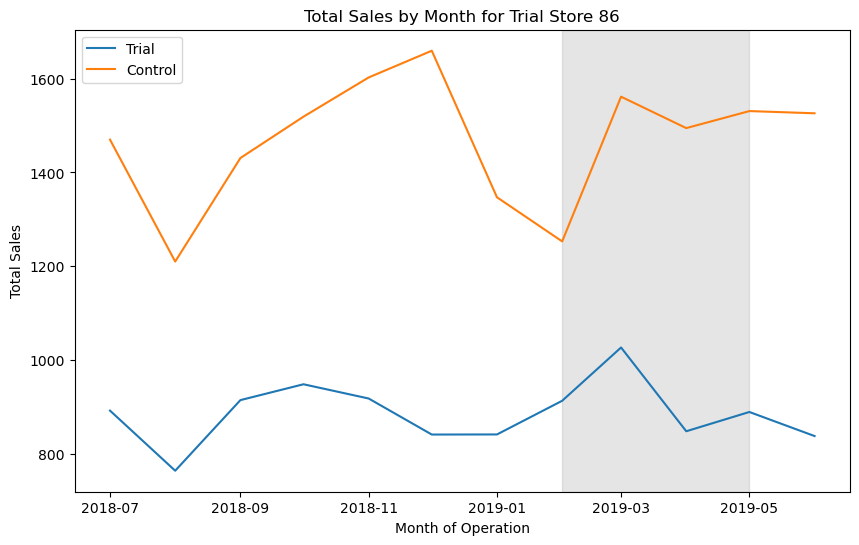

In [40]:
# Visual checks on trends based on the drivers
measure_over_time_sales = measure_over_time.copy()  # Assuming this is your sales data

# Create a new column for Store_type
measure_over_time_sales['Store_type'] = measure_over_time_sales['STORE_NBR'].apply(lambda x: 'Trial' if x == trial_store else 'Control')

# Create TransactionMonth
measure_over_time_sales['TransactionMonth'] = pd.to_datetime(measure_over_time_sales['YEARMONTH'].astype(str) + '01', format='%Y%m%d')

# Filter for the trial and control stores
past_sales = measure_over_time_sales[measure_over_time_sales['STORE_NBR'].isin([trial_store, control_store])]

# Plot the results
plt.figure(figsize=(10, 6))
for store_type in past_sales['Store_type'].unique():
    plt.plot(past_sales[past_sales['Store_type'] == store_type]['TransactionMonth'],
             past_sales[past_sales['Store_type'] == store_type]['totalSales'],
             label=store_type)

plt.axvspan(pd.to_datetime('2019-02-01'), pd.to_datetime('2019-05-01'), alpha=0.2, color='gray')
plt.xlabel("Month of Operation")
plt.ylabel("Total Sales")
plt.title("Total Sales by Month for Trial Store 86")
plt.legend()
plt.show()

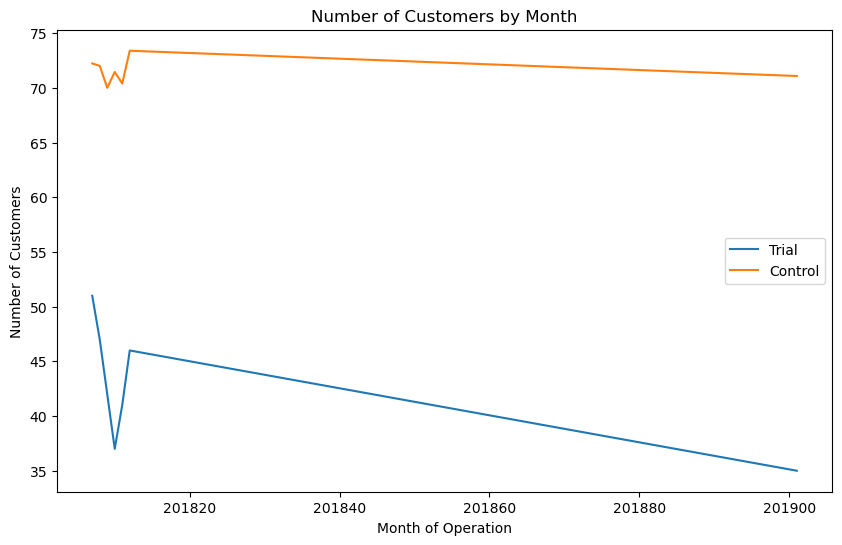

In [42]:
#  Create a new DataFrame for past customers
past_customers = measure_over_time_custs.copy()

# Create Store_type column
past_customers['Store_type'] = past_customers['STORE_NBR'].apply(lambda x: 'Trial' if x == 77 else 'Control')

# Create TransactionMonth column
past_customers['TransactionMonth'] = pd.to_datetime(past_customers['YEARMONTH'].astype(str) + '01', format='%Y%m%d')

# Group by YEARMONTH and Store_type to calculate the average number of customers
past_customers = past_customers.groupby(['YEARMONTH', 'Store_type'], as_index=False).agg(
    numberCustomers=('nCustomers', 'mean')
)

#  Filter for the relevant time period (before March 2019)
past_customers = past_customers[past_customers['YEARMONTH'] < 201903]

# Plot the results

plt.figure(figsize=(10, 6))
plt.plot(past_customers[past_customers['Store_type'] == 'Trial']['YEARMONTH'],
        past_customers[past_customers['Store_type'] == 'Trial']['numberCustomers'],
        label='Trial')
plt.plot(past_customers[past_customers['Store_type'] == 'Control']['YEARMONTH'],
        past_customers[past_customers['Store_type'] == 'Control']['numberCustomers'],
        label='Control')


plt.xlabel("Month of Operation")
plt.ylabel("Number of Customers")
plt.title("Number of Customers by Month")
plt.legend()

In [44]:
# Define trial and control store numbers
trial_store = 77
control_store = 86
# Define preTrialMeasures with specific columns
preTrialMeasures = measure_over_time[['STORE_NBR', 'YEARMONTH', 'totalSales']].copy()

# Scale pre-trial control sales to match pre-trial trial store sales
trial_sales_pre_trial = preTrialMeasures.loc[
    (preTrialMeasures['STORE_NBR'] == trial_store) & (preTrialMeasures['YEARMONTH'] < 201902), 'totalSales'].sum()

control_sales_pre_trial = preTrialMeasures.loc[
    (preTrialMeasures['STORE_NBR'] == control_store) & (preTrialMeasures['YEARMONTH'] < 201902), 'totalSales'].sum()

# Calculate scaling factor
scalingFactorForControlSales = trial_sales_pre_trial / control_sales_pre_trial if control_sales_pre_trial != 0 else 0

# Apply the scaling factor to control store sales
measureOverTimeSales = preTrialMeasures.copy()  # Assuming this is your sales data
measureOverTimeSales.loc[measureOverTimeSales['STORE_NBR'] == control_store, 'controlSales'] = measureOverTimeSales['totalSales'] * scalingFactorForControlSales

In [46]:
# Calculate the percentage difference between scaled control sales and trial sales
# Merge control and trial sales data
merged_sales = measureOverTimeSales.loc[measureOverTimeSales['STORE_NBR'].isin([trial_store, control_store]), 
                                         ['YEARMONTH', 'totalSales', 'controlSales']].copy()

# Calculate percentage difference
merged_sales['percentageDiff'] = (merged_sales['controlSales'] - merged_sales['totalSales']).abs() / merged_sales['totalSales'] * 100

# Calculate the standard deviation of percentage differences during the pre-trial period
stdDev = merged_sales[merged_sales['YEARMONTH'] < 201903]['percentageDiff'].std()
degreesOfFreedom = 7  # As specified

# SCreate a table with sales by store type and month
measureOverTimeSales['Store_type'] = measureOverTimeSales['STORE_NBR'].apply(lambda x: 'Trial' if x == trial_store else 'Control')
pastSales = measureOverTimeSales.groupby(['YEARMONTH', 'Store_type'], as_index=False).agg(totalSales=('totalSales', 'sum'))

In [48]:
# Calculate the 5th and 95th percentiles for control store sales
mean_control_sales = pastSales[pastSales['Store_type'] == 'Control']['totalSales'].mean()
control_std_dev = pastSales[pastSales['Store_type'] == 'Control']['totalSales'].std()

# Calculate confidence intervals
pastSales['Control 95th CI'] = pastSales['totalSales'].where(pastSales['Store_type'] == 'Control', 0) * (1 + 2 * (stdDev / mean_control_sales))
pastSales['Control 5th CI'] = pastSales['totalSales'].where(pastSales['Store_type'] == 'Control', 0) * (1 - 2 * (stdDev / mean_control_sales))

# Create a combined table
trialAssessment = pd.concat([pastSales, pastSales[['YEARMONTH', 'Control 95th CI', 'Control 5th CI']].rename(columns={'Control 95th CI': 'totalSales', 'Control 5th CI': 'totSales'})], ignore_index=True)

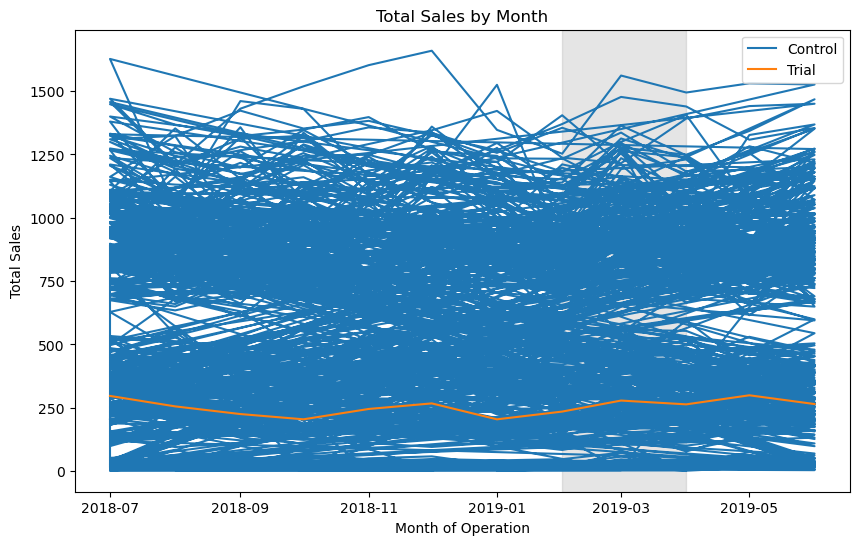

In [50]:
# Define preTrialMeasures with specific columns
preTrialMeasures = measure_over_time[['STORE_NBR', 'YEARMONTH', 'totalSales', 'nCustomers']].copy()

# Create a new column for Store_type
preTrialMeasures['Store_type'] = preTrialMeasures['STORE_NBR'].apply(lambda x: 'Trial' if x == 77 else 'Control')

#  Create TransactionMonth column
preTrialMeasures['TransactionMonth'] = pd.to_datetime(preTrialMeasures['YEARMONTH'].astype(str) + '01', format='%Y%m%d')

# Plot the results
plt.figure(figsize=(10, 6))
for store_type in preTrialMeasures['Store_type'].unique():
    plt.plot(preTrialMeasures[preTrialMeasures['Store_type'] == store_type]['TransactionMonth'],
             preTrialMeasures[preTrialMeasures['Store_type'] == store_type]['totalSales'],
             label=store_type)

plt.axvspan(pd.to_datetime('2019-02-01'), pd.to_datetime('2019-04-01'), alpha=0.2, color='gray')
plt.xlabel("Month of Operation")
plt.ylabel("Total Sales")
plt.title("Total Sales by Month")
plt.legend()
plt.show()


In [52]:
# Define trial and control store numbers
trial_store = 86  # Trial store number
control_store = 77  # Control store number

# Scale pre-trial control customers to match pre-trial trial store customers
trial_customers_pre_trial = preTrialMeasures.loc[
    (preTrialMeasures['STORE_NBR'] == trial_store) & (preTrialMeasures['YEARMONTH'] < 201902), 'nCustomers'].sum()

control_customers_pre_trial = preTrialMeasures.loc[
    (preTrialMeasures['STORE_NBR'] == control_store) & (preTrialMeasures['YEARMONTH'] < 201902), 'nCustomers'].sum()

# Calculate scaling factor
scalingFactorForControlCust = trial_customers_pre_trial / control_customers_pre_trial if control_customers_pre_trial != 0 else 0

# Apply the scaling factor
measureOverTimeCusts = preTrialMeasures.copy()  # Assuming this is your customer data
measureOverTimeCusts.loc[measureOverTimeCusts['STORE_NBR'] == control_store, 'controlCustomers'] = measureOverTimeCusts['nCustomers'] * scalingFactorForControlCust

In [54]:
# Create Store_type column
measureOverTimeCusts['Store_type'] = measureOverTimeCusts['STORE_NBR'].apply(lambda x: 'Trial' if x == trial_store else ('Control' if x == control_store else 'Other stores'))

# Calculate the percentage difference between scaled control customers and trial customers
scaledControlCustomers = measureOverTimeCusts[measureOverTimeCusts['STORE_NBR'] == control_store][['YEARMONTH', 'controlCustomers']].copy()
trialCustomers = measureOverTimeCusts[measureOverTimeCusts['STORE_NBR'] == trial_store][['YEARMONTH', 'nCustomers']].copy()

# Merge the dataframes on YEARMONTH
percentageDiff = scaledControlCustomers.merge(trialCustomers, on='YEARMONTH', suffixes=('_control', '_trial'))
percentageDiff['percentageDiff'] = (abs(percentageDiff['controlCustomers'] - percentageDiff['nCustomers']) / percentageDiff['controlCustomers']) * 100

# SCalculate the standard deviation of percentage differences during the pre-trial period
stdDev = percentageDiff[percentageDiff['YEARMONTH'] < 201902]['percentageDiff'].std()
degreesOfFreedom = 7  # As specified

In [56]:
# Create a table with sales by store type and month
pastCustomers = measureOverTimeCusts.groupby(['YEARMONTH', 'Store_type'], as_index=False).agg(nCusts=('nCustomers', 'mean'))

# Calculate the 95th and 5th percentiles for control store customers
pastCustomers_Controls95 = pastCustomers[pastCustomers['Store_type'] == 'Control'].copy()
pastCustomers_Controls95['nCusts'] *= (1 + stdDev * 2)
pastCustomers_Controls95['Store_type'] = 'Control 95th % confidence interval'

pastCustomers_Controls5 = pastCustomers[pastCustomers['Store_type'] == 'Control'].copy()
pastCustomers_Controls5['nCusts'] *= (1 - stdDev * 2)
pastCustomers_Controls5['Store_type'] = 'Control 5th % confidence interval'

#  Combine the tables
trialAssessment = pd.concat([pastCustomers, pastCustomers_Controls95, pastCustomers_Controls5], ignore_index=True)

In [ ]:
# Plotting the results
plt.figure(figsize=(10, 6))
for store_type in trialAssessment['Store_type'].unique():
    plt.plot(trialAssessment[trialAssessment['Store_type'] == store_type]['YEARMONTH'],
             trialAssessment[trialAssessment['Store_type'] == store_type]['nCusts'],
             label=store_type)

plt.xlabel("Month of Operation")
plt.ylabel("Total Number of Customers")
plt.title("Total Number of Customers by Month")
plt.legend()
plt.show()

In [205]:
# Define trial store number
trial_store = 88
# Calculate correlations for each potential control store
control_stores = measure_over_time['STORE_NBR'].unique()
correlations = {}

for control_store in control_stores:
    if control_store != trial_store:
        # Calculate correlation for total sales
        corr_nSales = measure_over_time.loc[measure_over_time['STORE_NBR'] == trial_store, 'totalSales'].corr(
            measure_over_time.loc[measure_over_time['STORE_NBR'] == control_store, 'totalSales']
        )
        # Calculate correlation for number of customers
        corr_nCustomers = measure_over_time.loc[measure_over_time['STORE_NBR'] == trial_store, 'nCustomers'].corr(
            measure_over_time.loc[measure_over_time['STORE_NBR'] == control_store, 'nCustomers']
        )
        correlations[control_store] = {
            'corr_nSales': corr_nSales,
            'corr_nCustomers': corr_nCustomers
        }

# Convert correlations to DataFrame
corr_df = pd.DataFrame(correlations).T

# Calculate magnitude distance for sales and customers
magnitude = {}

for control_store in corr_df.index:
    magnitude_nSales = 1 - (abs(measure_over_time.loc[measure_over_time['STORE_NBR'] == trial_store, 'totalSales'].values[0] - 
                                   measure_over_time.loc[measure_over_time['STORE_NBR'] == control_store, 'totalSales'].values[0]) / 
                                   (measure_over_time['totalSales'].max() - measure_over_time['totalSales'].min()))
    
    magnitude_nCustomers = 1 - (abs(measure_over_time.loc[measure_over_time['STORE_NBR'] == trial_store, 'nCustomers'].values[0] - 
                                         measure_over_time.loc[measure_over_time['STORE_NBR'] == control_store, 'nCustomers'].values[0]) / 
                                         (measure_over_time['nCustomers'].max() - measure_over_time['nCustomers'].min()))
    
    magnitude[control_store] = {
        'magnitude_nSales': magnitude_nSales,
        'magnitude_nCustomers': magnitude_nCustomers
    }

# Convert magnitude to DataFrame
magnitude_df = pd.DataFrame(magnitude).T

In [207]:
# Create a combined score
corr_weight = 0.5
score_df = pd.merge(corr_df, magnitude_df, left_index=True, right_index=True)

score_df['score_nSales'] = (corr_weight * score_df['corr_nSales']) + ((1 - corr_weight) * score_df['magnitude_nSales'])
score_df['score_nCustomers'] = (corr_weight * score_df['corr_nCustomers']) + ((1 - corr_weight) * score_df['magnitude_nCustomers'])

# Combine scores to compute a final combined score
score_df['finalControlScore'] = (score_df['score_nSales'] + score_df['score_nCustomers']) / 2

# Select control store based on the highest matching store
control_store = score_df.nlargest(1, 'finalControlScore').index[0]
print(f"Control Store for Trial Store {trial_store}: {control_store}")

Control Store for Trial Store 88: 1


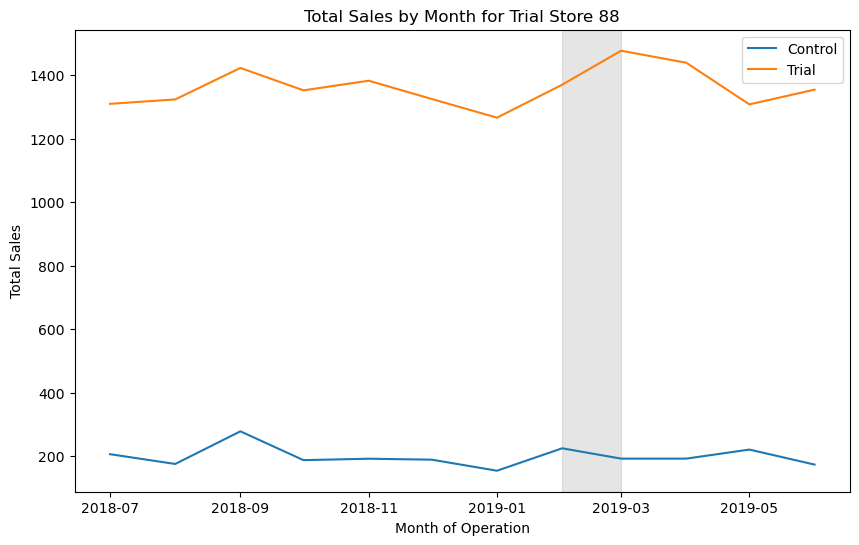

In [211]:
# Visual checks on trends based on total sales
# Create a new DataFrame for past sales
past_sales = measure_over_time.copy()

# Create Store_type column
past_sales['Store_type'] = past_sales['STORE_NBR'].apply(lambda x: 'Trial' if x == trial_store else 'Control')

# Create TransactionMonth column
past_sales['TransactionMonth'] = pd.to_datetime(past_sales['YEARMONTH'].astype(str) + '01', format='%Y%m%d')

# Filter for the trial and control stores
past_sales = past_sales[past_sales['STORE_NBR'].isin([trial_store, control_store])]

# Plot the results
plt.figure(figsize=(10, 6))
for store_type in past_sales['Store_type'].unique():
    plt.plot(past_sales[past_sales['Store_type'] == store_type]['TransactionMonth'],
             past_sales[past_sales['Store_type'] == store_type]['totalSales'],
             label=store_type)

plt.axvspan(pd.to_datetime('2019-02-01'), pd.to_datetime('2019-03-01'), alpha=0.2, color='gray')
plt.xlabel("Month of Operation")
plt.ylabel("Total Sales")
plt.title("Total Sales by Month for Trial Store 88")
plt.legend()
plt.show()

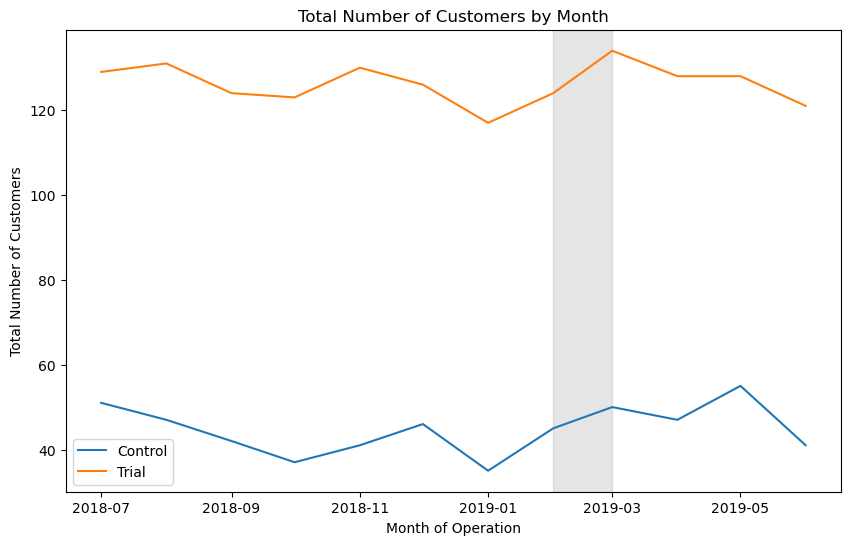

In [213]:
# Define trial and control store numbers
trial_store = 88  # Trial store number
control_store = 77  # Control store number
# Visual checks on trends based on the number of customers
# Create a new DataFrame for customer counts
past_customers = measure_over_time.copy()
# Create Store_type column
past_customers['Store_type'] = past_customers['STORE_NBR'].apply(lambda x: 'Trial' if x == trial_store else 'Control')
# Create TransactionMonth column
past_customers['TransactionMonth'] = pd.to_datetime(past_customers['YEARMONTH'].astype(str) + '01', format='%Y%m%d')
# Filter for the trial and control stores
past_customers = past_customers[past_customers['STORE_NBR'].isin([trial_store, control_store])]
# Plot the results for number of customers
plt.figure(figsize=(10, 6))
for store_type in past_customers['Store_type'].unique():
    plt.plot(past_customers[past_customers['Store_type'] == store_type]['TransactionMonth'],
             past_customers[past_customers['Store_type'] == store_type]['nCustomers'],
             label=store_type)

plt.axvspan(pd.to_datetime('2019-02-01'), pd.to_datetime('2019-03-01'), alpha=0.2, color='gray')
plt.xlabel("Month of Operation")
plt.ylabel("Total Number of Customers")
plt.title("Total Number of Customers by Month")
plt.legend()
plt.show()

      YEARMONTH                           STORE_NBR   totalSales
73       201807                                  77   296.800000
84       201807                                  88  1310.000000
338      201808                                  77   255.500000
348      201808                                  88  1323.800000
603      201809                                  77   225.200000
613      201809                                  88  1423.000000
868      201810                                  77   204.500000
878      201810                                  88  1352.400000
1132     201811                                  77   245.300000
1142     201811                                  88  1382.800000
1396     201812                                  77   267.300000
1406     201812                                  88  1325.200000
1658     201901                                  77   204.400000
1668     201901                                  88  1266.400000
1921     201902          

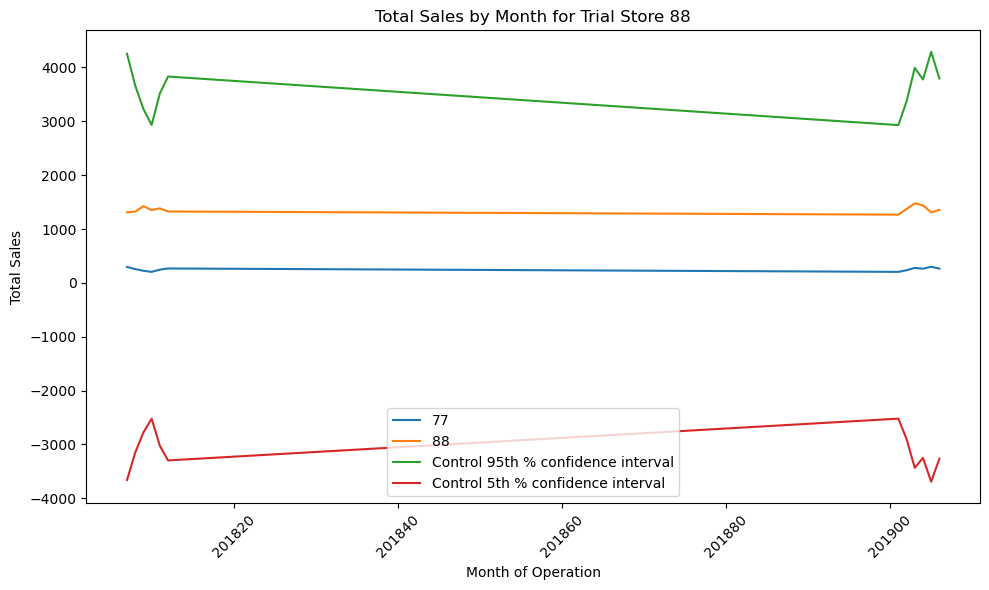

In [243]:
# Define trial and control store numbers
trial_store = 88  # Trial store number
control_store = 77  # Control store number
# Convert YEARMONTH from integer to datetime
measure_over_time['TransactionMonth'] = pd.to_datetime(measure_over_time['YEARMONTH'].astype(str) + '01', format='%Y%m%d')

# Scale pre-trial control store sales to match pre-trial trial store sales
trial_sales_pre_trial = measure_over_time.loc[
    (measure_over_time['STORE_NBR'] == trial_store) & (measure_over_time['YEARMONTH'] < 201902), 'totalSales'].sum()

control_sales_pre_trial = measure_over_time.loc[
    (measure_over_time['STORE_NBR'] == control_store) & (measure_over_time['YEARMONTH'] < 201902), 'totalSales'].sum()

# Calculate scaling factor
scalingFactorForControlSales = trial_sales_pre_trial / control_sales_pre_trial if control_sales_pre_trial != 0 else 0

#  Apply the scaling factor
measureOverTimeSales = measure_over_time.copy()
measureOverTimeSales.loc[measureOverTimeSales['STORE_NBR'] == control_store, 'scaledControlSales'] = measureOverTimeSales['totalSales'] * scalingFactorForControlSales

# Calculate the absolute percentage difference between scaled control sales and trial sales
scaledControlSales = measureOverTimeSales[measureOverTimeSales['STORE_NBR'] == control_store][['YEARMONTH', 'scaledControlSales']].copy()
trialSales = measureOverTimeSales[measureOverTimeSales['STORE_NBR'] == trial_store][['YEARMONTH', 'totalSales']].copy()

# Merge the dataframes on YEARMONTH
percentageDiff = scaledControlSales.merge(trialSales, on='YEARMONTH', suffixes=('_control', '_trial'))
percentageDiff['percentageDiff'] = (abs(percentageDiff['scaledControlSales'] - percentageDiff['totalSales']) / percentageDiff['scaledControlSales']) * 100

# Calculate the standard deviation of percentage differences during the pre-trial period
stdDev = percentageDiff[percentageDiff['YEARMONTH'] < 201902]['percentageDiff'].std()
degreesOfFreedom = 7  # As specified

# Create a table with sales by store type and month
pastSales = measureOverTimeSales.groupby(['YEARMONTH', 'STORE_NBR'], as_index=False).agg(totalSales=('totalSales', 'sum'))

# Calculate the 95th and 5th percentiles for control store sales
pastSales_Controls95 = pastSales[pastSales['STORE_NBR'] == control_store].copy()
pastSales_Controls95['totalSales'] *= (1 + stdDev * 2)
pastSales_Controls95['STORE_NBR'] = 'Control 95th % confidence interval'

pastSales_Controls5 = pastSales[pastSales['STORE_NBR'] == control_store].copy()
pastSales_Controls5['totalSales'] *= (1 - stdDev * 2)
pastSales_Controls5['STORE_NBR'] = 'Control 5th % confidence interval'

# Combine the tables
trialAssessment = pd.concat([pastSales, pastSales_Controls95[['YEARMONTH', 'totalSales', 'STORE_NBR']],
                              pastSales_Controls5[['YEARMONTH', 'totalSales', 'STORE_NBR']]], ignore_index=True)

#  Filter the DataFrame to include only relevant stores for plotting
trialAssessment_filtered = trialAssessment[trialAssessment['STORE_NBR'].isin([trial_store, control_store, 'Control 95th % confidence interval', 'Control 5th % confidence interval'])]

# Check the filtered DataFrame before plotting
print(trialAssessment_filtered)

# Plotting the results
plt.figure(figsize=(10, 6))

# Ensure that the plotting logic is correct
for store_type in trialAssessment_filtered['STORE_NBR'].unique():
    plt.plot(trialAssessment_filtered[trialAssessment_filtered['STORE_NBR'] == store_type]['YEARMONTH'],
             trialAssessment_filtered[trialAssessment_filtered['STORE_NBR'] == store_type]['totalSales'],
             label=store_type)



plt.xlabel("Month of Operation")
plt.ylabel("Total Sales")
plt.title("Total Sales by Month for Trial Store 88")
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [245]:
# Define trial and control store numbers
trial_store = 88  # Trial store number
control_store = 77  # Control store number

# Scale pre-trial control store customers to match pre-trial trial store customers
trial_customers_pre_trial = measure_over_time.loc[
    (measure_over_time['STORE_NBR'] == trial_store) & (measure_over_time['YEARMONTH'] < 201902), 'nCustomers'].sum()

control_customers_pre_trial = measure_over_time.loc[
    (measure_over_time['STORE_NBR'] == control_store) & (measure_over_time['YEARMONTH'] < 201902), 'nCustomers'].sum()

# Calculate scaling factor
scalingFactorForControlCust = trial_customers_pre_trial / control_customers_pre_trial if control_customers_pre_trial != 0 else 0

# Apply the scaling factor
measureOverTimeCusts = measure_over_time.copy()
measureOverTimeCusts.loc[measureOverTimeCusts['STORE_NBR'] == control_store, 'scaledControlCustomers'] = measureOverTimeCusts['nCustomers'] * scalingFactorForControlCust

In [248]:
# Calculate the absolute percentage difference between scaled control customers and trial customers
scaledControlCustomers = measureOverTimeCusts[measureOverTimeCusts['STORE_NBR'] == control_store][['YEARMONTH', 'scaledControlCustomers']].copy()
trialCustomers = measureOverTimeCusts[measureOverTimeCusts['STORE_NBR'] == trial_store][['YEARMONTH', 'nCustomers']].copy()

# Merge the dataframes on YEARMONTH
percentageDiff = scaledControlCustomers.merge(trialCustomers, on='YEARMONTH', suffixes=('_control', '_trial'))
percentageDiff['percentageDiff'] = (abs(percentageDiff['scaledControlCustomers'] - percentageDiff['nCustomers']) / percentageDiff['scaledControlCustomers']) * 100

# Calculate the standard deviation of percentage differences during the pre-trial period
stdDev = percentageDiff[percentageDiff['YEARMONTH'] < 201902]['percentageDiff'].std()
degreesOfFreedom = 7  # As specified

# Create a table with customer counts by store type and month
pastCustomers = measureOverTimeCusts.groupby(['YEARMONTH', 'STORE_NBR'], as_index=False).agg(nCustomers=('nCustomers', 'sum'))

In [250]:
# Calculate the 95th and 5th percentiles for control store customers
pastCustomers_Controls95 = pastCustomers[pastCustomers['STORE_NBR'] == control_store].copy()
pastCustomers_Controls95['nCustomers'] *= (1 + stdDev * 2)
pastCustomers_Controls95['STORE_NBR'] = 'Control 95th % confidence interval'

pastCustomers_Controls5 = pastCustomers[pastCustomers['STORE_NBR'] == control_store].copy()
pastCustomers_Controls5['nCustomers'] *= (1 - stdDev * 2)
pastCustomers_Controls5['STORE_NBR'] = 'Control 5th % confidence interval'

# Combine the tables
trialAssessment = pd.concat([pastCustomers, pastCustomers_Controls95[['YEARMONTH', 'nCustomers', 'STORE_NBR']],
                              pastCustomers_Controls5[['YEARMONTH', 'nCustomers', 'STORE_NBR']]], ignore_index=True)

# Filter the DataFrame to include only relevant stores for plotting
trialAssessment_filtered = trialAssessment[trialAssessment['STORE_NBR'].isin([trial_store, control_store, 'Control 95th % confidence interval', 'Control 5th % confidence interval'])]

# Check the filtered DataFrame before plotting
print(trialAssessment_filtered)


      YEARMONTH                           STORE_NBR  nCustomers
73       201807                                  77   51.000000
84       201807                                  88  129.000000
338      201808                                  77   47.000000
348      201808                                  88  131.000000
603      201809                                  77   42.000000
613      201809                                  88  124.000000
868      201810                                  77   37.000000
878      201810                                  88  123.000000
1132     201811                                  77   41.000000
1142     201811                                  88  130.000000
1396     201812                                  77   46.000000
1406     201812                                  88  126.000000
1658     201901                                  77   35.000000
1668     201901                                  88  117.000000
1921     201902                         

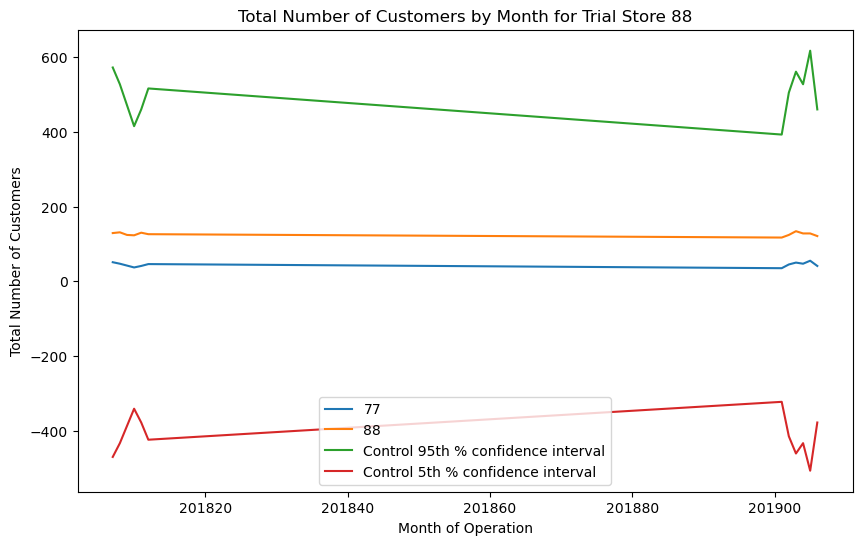

In [254]:
#  Plotting the results
plt.figure(figsize=(10, 6))
for store_type in trialAssessment_filtered['STORE_NBR'].unique():
    plt.plot(trialAssessment_filtered[trialAssessment_filtered['STORE_NBR'] == store_type]['YEARMONTH'],
             trialAssessment_filtered[trialAssessment_filtered['STORE_NBR'] == store_type]['nCustomers'],
             label=store_type)
plt.xlabel("Month of Operation")
plt.ylabel("Total Number of Customers")
plt.title("Total Number of Customers by Month for Trial Store 88")
plt.legend()
plt.show()